# Business License Status Prediction

## Import Required Libraries

In [247]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from datetime import datetime

## Loading the Train Data and Test Data

In [248]:
# Importing the dataset
Train = pd.read_csv(r'C:\Users\Bharti Lenday\ZS_Train_file.csv')
Test = pd.read_csv(r'C:\Users\Bharti Lenday\ZS_Test_File.csv')

C:\Users\Bharti Lenday\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [249]:
my_submission = pd.DataFrame({'ID': Test.ID})
my_submission.head(3)

,ID
0,1516615-20120216
1,69813-20110616
2,1519227-20041116


## Data Inspection

In [250]:
Train.head(3)

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623,...,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,...,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,...,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [251]:
Test.head(3)

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610.0,...,N,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-20T00:00:00,2012-12-29T00:00:00,NaN,41.890047,-87.637467,"{'latitude': '41.89004724888915', 'longitude':..."
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,...,N,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-05T00:00:00,2012-12-29T00:00:00,NaN,41.786485,-87.676665,"{'latitude': '41.786485235679486', 'longitude'..."
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605.0,...,N,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-07T00:00:00,NaN,NaN,41.868269,-87.625695,"{'latitude': '41.86826924843568', 'longitude':..."


In [252]:
# Shape of the dataset
print('Shape of the Train data:',Train.shape)
print('Shape of the Test data:',Test.shape)

Shape of the Train data: (85895, 32)
Shape of the Test data: (57239, 31)



* **The Train data contains 85895 rows and 32 columns including the target column.**
* **The Test data contains 57239 rows and 31 columns.**

In [253]:
# Checking the data types of each column of this dataset.
print('Data type of Train data :\n' , Train.dtypes,'\n\n')
print('Data type of Test data :\n', Test.dtypes)

Data type of Train data :
 ID                                    object
LICENSE ID                             int64
ACCOUNT NUMBER                         int64
SITE NUMBER                            int64
LEGAL NAME                            object
DOING BUSINESS AS NAME                object
ADDRESS                               object
CITY                                  object
STATE                                 object
ZIP CODE                              object
WARD                                 float64
PRECINCT                             float64
WARD PRECINCT                         object
POLICE DISTRICT                      float64
LICENSE CODE                           int64
LICENSE DESCRIPTION                   object
LICENSE NUMBER                       float64
APPLICATION TYPE                      object
APPLICATION CREATED DATE              object
APPLICATION REQUIREMENTS COMPLETE     object
PAYMENT DATE                          object
CONDITIONAL APPROVAL        

In [254]:
# Checking the columns of both the data.
print('Columns of Train data :\n' , Train.columns,'\n\n\n')
print('Columns of Test data :\n', Test.columns)

Columns of Train data :
 Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE',
       'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'LICENSE STATUS'],
      dtype='object') 



Columns of Test data :
 Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE

**Test data does not include the target variable i.e. 'LICENSE STATUS'  Column.**

In [255]:
# Information of both the data
print( Train.info(),'\n\n')
print( Test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 85895 non-null  object 
 1   LICENSE ID                         85895 non-null  int64  
 2   ACCOUNT NUMBER                     85895 non-null  int64  
 3   SITE NUMBER                        85895 non-null  int64  
 4   LEGAL NAME                         85895 non-null  object 
 5   DOING BUSINESS AS NAME             85894 non-null  object 
 6   ADDRESS                            85895 non-null  object 
 7   CITY                               85895 non-null  object 
 8   STATE                              85895 non-null  object 
 9   ZIP CODE                           85864 non-null  object 
 10  WARD                               36194 non-null  float64
 11  PRECINCT                           29194 non-null  flo

In [256]:
# Describe both data
Train.describe()

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,SSA,LATITUDE,LONGITUDE
count,8.589500e+04,85895.000000,85895.000000,36194.000000,29194.000000,31883.000000,85895.000000,8.589400e+04,9449.000000,38649.000000,38649.000000
mean,1.751303e+06,196695.421701,2.556028,28.528927,54.632973,13.529812,1111.736620,1.228151e+06,29.152080,41.880952,-87.681165
std,3.358780e+05,126819.343760,8.655706,13.921710,163.174955,7.275874,250.020872,7.431487e+05,17.419898,0.079617,0.056248
min,3.079300e+04,10.000000,1.000000,1.000000,1.000000,1.000000,1002.000000,1.290000e+02,1.000000,41.644694,-87.915285
25%,1.469024e+06,54615.000000,1.000000,17.000000,12.000000,8.000000,1010.000000,8.710900e+04,17.000000,41.834312,-87.719150
50%,1.778754e+06,248313.000000,1.000000,30.000000,26.000000,14.000000,1010.000000,1.442202e+06,28.000000,41.892679,-87.673321
75%,2.067578e+06,300243.500000,2.000000,42.000000,41.000000,19.000000,1011.000000,1.816581e+06,40.000000,41.938624,-87.639509
max,2.456551e+06,397444.000000,417.000000,50.000000,999.000000,181.000000,8340.000000,2.391410e+06,69.000000,42.022660,-87.525872


In [257]:
Test.describe()

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,SSA,LATITUDE,LONGITUDE
count,5.723900e+04,57239.000000,57239.000000,57227.000000,56613.000000,55661.000000,55764.00000,57239.000000,5.723900e+04,15908.000000,56329.000000,56329.000000
mean,1.867003e+06,187884.083719,4.518685,60580.682982,28.072987,27.203105,13.16369,1243.865197,1.208141e+06,29.852653,41.879834,-87.678037
std,3.788378e+05,139139.743948,19.860738,2088.082252,14.587923,20.639461,7.11839,683.092249,8.530084e+05,17.447423,0.078721,0.055403
min,9.803000e+03,10.000000,1.000000,1830.000000,1.000000,1.000000,0.00000,1002.000000,4.300000e+01,1.000000,41.644712,-87.933976
25%,1.553288e+06,41316.000000,1.000000,60612.000000,16.000000,12.000000,8.00000,1010.000000,6.149350e+04,17.000000,41.834519,-87.713276
50%,1.912282e+06,222091.000000,1.000000,60624.000000,30.000000,26.000000,14.00000,1010.000000,1.473632e+06,29.000000,41.891538,-87.669686
75%,2.137864e+06,312884.000000,2.000000,60641.000000,42.000000,41.000000,18.00000,1275.000000,1.928348e+06,43.000000,41.938297,-87.635921
max,2.615886e+06,429413.000000,507.000000,98003.000000,50.000000,999.000000,25.00000,8344.000000,2.615886e+06,69.000000,42.022630,-87.525872


In [258]:
# Number of unique values in each columns and unique values in each columns.

for i in Train.columns:
    print("Unique value of = {} [[{}]]\n{}\n".format(i, len(Train[i].unique()), Train[i].unique()))

Unique value of = ID [[85895]]
['35342-20020816' '1358463-20051116' '1980233-20090722' ...
 '74137-20090116' '2049545-20111016' '1070196-20040216']

Unique value of = LICENSE ID [[85895]]
[1256593 1639294 1980233 ... 1939358 2110060 1461628]

Unique value of = ACCOUNT NUMBER [[38897]]
[ 32811 262311 345008 ... 354402  64945 361777]

Unique value of = SITE NUMBER [[177]]
[  1  29   2   3   5  19  30  14  42  12  35  21  94  13   4  22  10   6
  25 171  70   8   7  15   9  34  31  16  78  18  75  88 111  63  20  37
  36  38  11  27  66  89  33  79  48  62  23  73  26  77 112  64  17  80
  44 139  50  54  92  43  53 127  28 123 108  46  95  24 145  76  86  82
  49 116  67 105  40  65  69  97  32  52 119  83 122  45 215  41  93  99
  58  56  60 140  91 181 103  68 129  39 188  59  51 237  96  47 101  55
  74 126 121  57  85  72  90  61 146  81 114 183 120 307 144  87  71 117
 160 125 159  84 118 187 100 147 158 153 107 163 133 136 128 134 113 151
 115 135 102 138 148 166 130 164 106 137  9

In [259]:
#Distribution of Target Variable
Train['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

C:\Users\Bharti Lenday\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


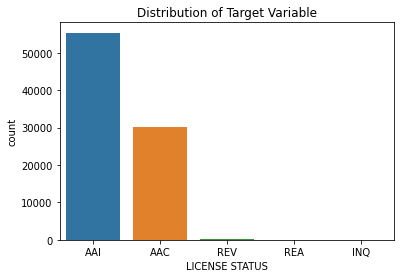

In [260]:
plt.title('Distribution of Target Variable')
sns.countplot(Train['LICENSE STATUS'])
plt.show()

In [261]:
Train.nunique()

ID                                   85895
LICENSE ID                           85895
ACCOUNT NUMBER                       38897
SITE NUMBER                            177
LEGAL NAME                           38744
DOING BUSINESS AS NAME               41686
ADDRESS                              42146
CITY                                  1223
STATE                                   54
ZIP CODE                              2172
WARD                                    50
PRECINCT                                76
WARD PRECINCT                         2382
POLICE DISTRICT                         28
LICENSE CODE                           106
LICENSE DESCRIPTION                    106
LICENSE NUMBER                       49768
APPLICATION TYPE                         5
APPLICATION CREATED DATE              2899
APPLICATION REQUIREMENTS COMPLETE     3078
PAYMENT DATE                          4356
CONDITIONAL APPROVAL                     2
LICENSE TERM START DATE               2825
LICENSE TER

In [262]:
Test.nunique()

ID                                   57239
LICENSE ID                           57239
ACCOUNT NUMBER                       36724
SITE NUMBER                            297
LEGAL NAME                           36523
DOING BUSINESS AS NAME               39364
ADDRESS                              39637
CITY                                   331
STATE                                   43
ZIP CODE                               420
WARD                                    50
PRECINCT                                76
WARD PRECINCT                         2459
POLICE DISTRICT                         25
LICENSE CODE                           124
LICENSE DESCRIPTION                    124
LICENSE NUMBER                       49383
APPLICATION TYPE                         6
APPLICATION CREATED DATE              3684
APPLICATION REQUIREMENTS COMPLETE     3884
PAYMENT DATE                          4930
CONDITIONAL APPROVAL                     2
LICENSE TERM START DATE               3737
LICENSE TER

## Data Preprocessing

### Feature extraction

In [263]:
# Function to extraxt date from datetime columns.

date_columns = ['APPLICATION REQUIREMENTS COMPLETE','PAYMENT DATE','LICENSE TERM START DATE','LICENSE TERM EXPIRATION DATE',
                'DATE ISSUED','LICENSE STATUS CHANGE DATE','LICENSE APPROVED FOR ISSUANCE']
def dates(date_columns):
     for i in date_columns:
            Train[i]= pd.to_datetime(Train[i])
            Test[i]= pd.to_datetime(Test[i])

In [264]:
dates(date_columns)

In [265]:
# Function to obtain year and month from date column.

def Get_year(col_name, date_column):
    Train[col_name] = Train[date_column].apply(lambda x : x.year)
    Test[col_name] = Test[date_column].apply(lambda x : x.year)
    

def Get_month(col_name, actual_date_column):
    Train[col_name] = Train[actual_date_column].apply(lambda x : x.month)
    Test[col_name] = Test[actual_date_column].apply(lambda x : x.month)    

In [266]:
Get_year('PAYMENT YEAR', 'PAYMENT DATE')
Get_year('PAYMENT MONTH', 'PAYMENT DATE')
Get_year('APPLICATION REQUIREMENTS COMPLETE YEAR', 'APPLICATION REQUIREMENTS COMPLETE')
Get_year('LICENSE TERM START YEAR', 'LICENSE TERM START DATE')
Get_year('LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM EXPIRATION DATE')
Get_year('DATE ISSUED YEAR', 'DATE ISSUED')
Get_year('LICENSE STATUS CHANGE YEAR', 'LICENSE STATUS CHANGE DATE')
Get_year('LICENSE APPROVED FOR ISSUANCE YEAR', 'LICENSE APPROVED FOR ISSUANCE')

In [267]:
Train['LICENSE VALIDITY'] = abs(Train['LICENSE TERM EXPIRATION YEAR']-Train['LICENSE TERM START YEAR'])
Test['LICENSE VALIDITY'] = abs(Test['LICENSE TERM EXPIRATION YEAR']-Test['LICENSE TERM START YEAR'])

### Dimensionality Reduction

In [268]:
# Dropping unnecessary columns 
column_list = ['ID','LICENSE ID','LOCATION','ADDRESS','APPLICATION CREATED DATE','SSA','APPLICATION REQUIREMENTS COMPLETE',
               'PAYMENT DATE', 'LICENSE TERM START DATE','LICENSE TERM EXPIRATION DATE','LICENSE APPROVED FOR ISSUANCE',
               'DATE ISSUED','LICENSE STATUS CHANGE DATE','LICENSE TERM START YEAR','LICENSE TERM EXPIRATION YEAR'] 
Train = Train.drop(column_list, axis = 1)
Test = Test.drop(column_list, axis = 1)

In [269]:
Train.head(3)

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,...,LATITUDE,LONGITUDE,LICENSE STATUS,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE APPROVED FOR ISSUANCE YEAR,LICENSE VALIDITY
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,IL,60623,22.0,28.0,22-28,...,41.843613,-87.714618,AAI,2002.0,2002.0,2002.0,2006,NaN,2002.0,1.0
1,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,IL,60618,33.0,23.0,33-23,...,41.961132,-87.699626,AAC,2005.0,2005.0,2005.0,2006,2006.0,2006.0,1.0
2,345008,1,DJS REMODELING,"DJS REMODELING, INC.",HIGHLAND,IL,60035,NaN,NaN,NaN,...,NaN,NaN,AAI,2009.0,2009.0,2009.0,2009,NaN,2009.0,2.0


### Missing Value Analysis

**Checking Missing values in Train and Test data set.**

ACCOUNT NUMBER                                0
SITE NUMBER                                   0
LEGAL NAME                                    0
DOING BUSINESS AS NAME                        1
CITY                                          0
STATE                                         0
ZIP CODE                                     31
WARD                                      49701
PRECINCT                                  56701
WARD PRECINCT                             49700
POLICE DISTRICT                           54012
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
LICENSE NUMBER                                1
APPLICATION TYPE                              0
CONDITIONAL APPROVAL                          0
LATITUDE                                  47246
LONGITUDE                                 47246
LICENSE STATUS                                0
PAYMENT YEAR                               1289
PAYMENT MONTH                           

<AxesSubplot:>

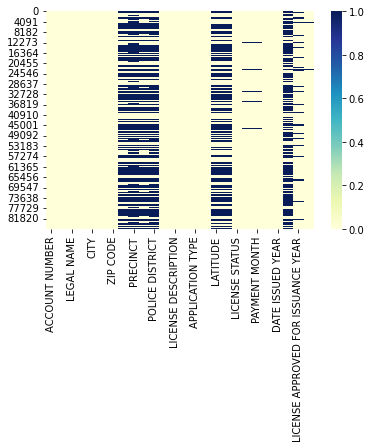

In [270]:
# Train data set
print(Train.isnull().sum())

# Visualizing the same using heatmap.
sns.heatmap(Train.isnull(), cmap = 'YlGnBu')

ACCOUNT NUMBER                                0
SITE NUMBER                                   0
LEGAL NAME                                    0
DOING BUSINESS AS NAME                        2
CITY                                          0
STATE                                         0
ZIP CODE                                     12
WARD                                        626
PRECINCT                                   1578
WARD PRECINCT                               616
POLICE DISTRICT                            1475
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
LICENSE NUMBER                                0
APPLICATION TYPE                              0
CONDITIONAL APPROVAL                          0
LATITUDE                                    910
LONGITUDE                                   910
PAYMENT YEAR                               1051
PAYMENT MONTH                              1051
APPLICATION REQUIREMENTS COMPLETE YEAR  

<AxesSubplot:>

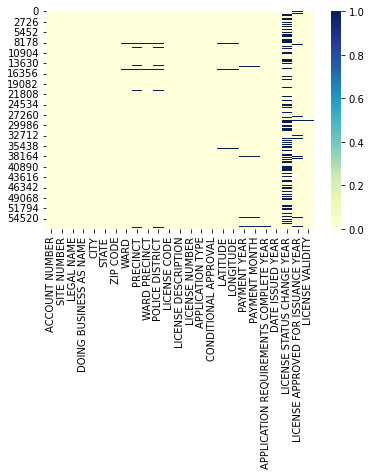

In [271]:
# Test data set
print(Test.isnull().sum())

# Visualizing the same using heatmap.
sns.heatmap(Test.isnull(), cmap = 'YlGnBu')

**Impute missing values in 'DOING BUSINESS AS NAME' with 'None'.**

In [272]:
Train['DOING BUSINESS AS NAME'] = Train['DOING BUSINESS AS NAME'].fillna('None')
Test['DOING BUSINESS AS NAME'] = Test['DOING BUSINESS AS NAME'].fillna('None')

**Extract useful information from the column 'LEGAL NAME' and 'DOING BUSINESS AS NAME'.**

In [273]:
Train['LEGAL NAME'].apply(lambda x : x.upper) 
Train['DOING BUSINESS AS NAME'].apply(lambda x : x.upper)
Train.head(3)

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,...,LATITUDE,LONGITUDE,LICENSE STATUS,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE APPROVED FOR ISSUANCE YEAR,LICENSE VALIDITY
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,IL,60623,22.0,28.0,22-28,...,41.843613,-87.714618,AAI,2002.0,2002.0,2002.0,2006,NaN,2002.0,1.0
1,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,IL,60618,33.0,23.0,33-23,...,41.961132,-87.699626,AAC,2005.0,2005.0,2005.0,2006,2006.0,2006.0,1.0
2,345008,1,DJS REMODELING,"DJS REMODELING, INC.",HIGHLAND,IL,60035,NaN,NaN,NaN,...,NaN,NaN,AAI,2009.0,2009.0,2009.0,2009,NaN,2009.0,2.0


In [274]:
Test['LEGAL NAME'].apply(lambda x : x.upper) 
Test['DOING BUSINESS AS NAME'].apply(lambda x : x.upper)
Test.head(3)

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,...,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE APPROVED FOR ISSUANCE YEAR,LICENSE VALIDITY
0,280120,1,RS HOMES I LLC,RS HOMES I LLC,CHICAGO,IL,60610.0,42.0,67.0,42-67,...,N,41.890047,-87.637467,2012.0,2012.0,2011.0,2012,2012.0,2012.0,2.0
1,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,CHICAGO,IL,60636.0,16.0,5.0,16-May,...,N,41.786485,-87.676665,2012.0,2012.0,2011.0,2012,2012.0,2012.0,2.0
2,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,CHICAGO,IL,60605.0,4.0,8.0,04-Aug,...,N,41.868269,-87.625695,2004.0,2004.0,2004.0,2004,NaN,2004.0,1.0


In [275]:
Train['LEGAL TYPE'] = 'PVT'
Test['LEGAL TYPE'] = 'PVT'

In [276]:
Train['LEGAL TYPE'] = np.where(Train['LEGAL NAME'].str.contains('INC'),'INC',Train['LEGAL TYPE'])
Train['LEGAL TYPE'] = np.where(Train['DOING BUSINESS AS NAME'].str.contains('INC'),'INC',Train['LEGAL TYPE'])
Train['LEGAL TYPE'] = np.where(Train['LEGAL NAME'].str.contains('INCORPORATED'),'INC',Train['LEGAL TYPE'])
Train['LEGAL TYPE'] = np.where(Train['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'),'INC',Train['LEGAL TYPE'])

In [277]:
Test['LEGAL TYPE'] = np.where(Test['LEGAL NAME'].str.contains('INC'),'INC',Test['LEGAL TYPE'])
Test['LEGAL TYPE'] = np.where(Test['DOING BUSINESS AS NAME'].str.contains('INC'),'INC',Test['LEGAL TYPE'])
Test['LEGAL TYPE'] = np.where(Test['LEGAL NAME'].str.contains('INCORPORATED'),'INC',Test['LEGAL TYPE'])
Test['LEGAL TYPE'] = np.where(Test['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'),'INC',Test['LEGAL TYPE'])

In [278]:
Train['LEGAL TYPE'] = np.where(Train['LEGAL NAME'].str.contains('LLC'),'LLC',Train['LEGAL TYPE'])
Train['LEGAL TYPE'] = np.where(Train['DOING BUSINESS AS NAME'].str.contains('LLC'),'LLC',Train['LEGAL TYPE'])

In [279]:
Test['LEGAL TYPE'] = np.where(Test['LEGAL NAME'].str.contains('LLC'),'LLC',Test['LEGAL TYPE'])
Test['LEGAL TYPE'] = np.where(Test['DOING BUSINESS AS NAME'].str.contains('LLC'),'LLC',Test['LEGAL TYPE'])

In [280]:
Train['LEGAL TYPE'] = np.where(Train['LEGAL NAME'].str.contains('CO'),'CORP',Train['LEGAL TYPE'])
Train['LEGAL TYPE'] = np.where(Train['DOING BUSINESS AS NAME'].str.contains('CO'),'CORP',Train['LEGAL TYPE'])
Train['LEGAL TYPE'] = np.where(Train['LEGAL NAME'].str.contains('CORP'),'CORP',Train['LEGAL TYPE'])
Train['LEGAL TYPE'] = np.where(Train['DOING BUSINESS AS NAME'].str.contains('CORP'),'CORP',Train['LEGAL TYPE'])
Train['LEGAL TYPE'] = np.where(Train['LEGAL NAME'].str.contains('CORPORATION'),'CORP',Train['LEGAL TYPE'])
Train['LEGAL TYPE'] = np.where(Train['DOING BUSINESS AS NAME'].str.contains('CORPORATION'),'CORP',Train['LEGAL TYPE'])

In [281]:
Test['LEGAL TYPE'] = np.where(Test['LEGAL NAME'].str.contains('CO'),'CORP',Test['LEGAL TYPE'])
Test['LEGAL TYPE'] = np.where(Test['DOING BUSINESS AS NAME'].str.contains('CO'),'CORP',Test['LEGAL TYPE'])
Test['LEGAL TYPE'] = np.where(Test['LEGAL NAME'].str.contains('CORP'),'CORP',Test['LEGAL TYPE'])
Test['LEGAL TYPE'] = np.where(Test['DOING BUSINESS AS NAME'].str.contains('CORP'),'CORP',Test['LEGAL TYPE'])
Test['LEGAL TYPE'] = np.where(Test['LEGAL NAME'].str.contains('CORPORATION'),'CORP',Test['LEGAL TYPE'])
Test['LEGAL TYPE'] = np.where(Test['DOING BUSINESS AS NAME'].str.contains('CORPORATION'),'CORP',Test['LEGAL TYPE'])

In [282]:
Train['LEGAL TYPE'] = np.where(Train['LEGAL NAME'].str.contains('LTD'),'LTD',Train['LEGAL TYPE'])
Train['LEGAL TYPE'] = np.where(Train['DOING BUSINESS AS NAME'].str.contains('LTD'),'LTD',Train['LEGAL TYPE'])
Train['LEGAL TYPE'] = np.where(Train['LEGAL NAME'].str.contains('LIMITED'),'LTD',Train['LEGAL TYPE'])
Train['LEGAL TYPE'] = np.where(Train['DOING BUSINESS AS NAME'].str.contains('LIMITED'),'LTD',Train['LEGAL TYPE'])

In [283]:
Test['LEGAL TYPE'] = np.where(Test['LEGAL NAME'].str.contains('LTD'),'LTD',Test['LEGAL TYPE'])
Test['LEGAL TYPE'] = np.where(Test['DOING BUSINESS AS NAME'].str.contains('LTD'),'LTD',Test['LEGAL TYPE'])
Test['LEGAL TYPE'] = np.where(Test['LEGAL NAME'].str.contains('LIMITED'),'LTD',Test['LEGAL TYPE'])
Test['LEGAL TYPE'] = np.where(Test['DOING BUSINESS AS NAME'].str.contains('LIMITED'),'LTD',Test['LEGAL TYPE'])

In [284]:
Train['LEGAL TYPE'].value_counts()

CORP    27760
PVT     27366
INC     24449
LLC      4705
LTD      1615
Name: LEGAL TYPE, dtype: int64

In [285]:
Test['LEGAL TYPE'].value_counts()

INC     19604
PVT     17989
CORP    13495
LLC      4632
LTD      1519
Name: LEGAL TYPE, dtype: int64

In [286]:
# Dropping unnecessary columns 
column_list = ['DOING BUSINESS AS NAME', 'LEGAL NAME'] 
Train = Train.drop(column_list, axis = 1)
Test = Test.drop(column_list, axis = 1)

**Derive useful information from column 'LICENSE DESCRIPTION'.**

In [287]:
Train['LICENSE DESCRIPTION'].nunique()

106

In [288]:
Train['LICENSE DESCRIPTION'].unique()

array(['Limited Business License', 'Mobile Food Dispenser', 'Home Repair',
       'Motor Vehicle Repair : Engine Only (Class II)',
       'Kennels and Catteries', 'Hazardous Materials',
       'Retail Food Establishment', 'Automatic Amusement Device Operator',
       'Home Occupation', 'Peddler, food (fruits and vegtables only)',
       'Music and Dance', 'Street Performer', 'Peddler, non-food',
       'Body Piercing', 'Massage Therapist', 'Veterinary Hospital',
       'Auctioneer', 'Broker', 'Residential Real Estate Developer',
       'Electronic Equipment Repair', 'Filling Station',
       'Valet Parking Operator', 'Scavenger, Private',
       'Repossessor Class B Employee', 'Tavern',
       'Mobile Frozen Desserts Dispenser - Non-Motorized',
       'Peddler,food - (fruits and vegetables only) - special',
       'Peddler, non-food, special', 'Grooming Facility', 'Package Goods',
       'Motor Vehicle Repair; Specialty(Class I)',
       'Retail Computing Center',
       'Consumption o

In [289]:
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Junk Peddler', 'Peddler')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Single Room Occupancy Class II', 'Single Room Occupancy')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Single Room Occupancy Class I', 'Single Room Occupancy')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Tobacco Dealer Wholesale', 'Tobacco')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Tobacco Vending, Individual', 'Tobacco')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Tobacco Vending Machine Operator', 'Tobacco')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Tobacco Sampler', 'Tobacco')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Secondhand Dealer - Children\'s Products', 'Secondhand Dealer')
Train['LICENSE DESCRIPTION'] = Train['LICENSE DESCRIPTION'].replace('Secondhand Dealer (No Valuable Objects)', 'Secondhand Dealer')

In [290]:
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Junk Peddler', 'Peddler')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Single Room Occupancy Class II', 'Single Room Occupancy')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Single Room Occupancy Class I', 'Single Room Occupancy')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Tobacco Dealer Wholesale', 'Tobacco')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Tobacco Vending, Individual', 'Tobacco')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Tobacco Vending Machine Operator', 'Tobacco')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Tobacco Sampler', 'Tobacco')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Secondhand Dealer - Children\'s Products', 'Secondhand Dealer')
Test['LICENSE DESCRIPTION'] = Test['LICENSE DESCRIPTION'].replace('Secondhand Dealer (No Valuable Objects)', 'Secondhand Dealer')

In [291]:
Train['LICENSE DESCRIPTION'].value_counts()

Limited Business License                    50078
Home Repair                                 10633
Peddler                                      3914
Home Occupation                              2809
Retail Food Establishment                    2321
                                            ...  
Indoor Special Event                            1
Caterer's Registration (Liquor)                 1
Affiliation                                     1
Airport Pushcart Liquor O'Hare - Class A        1
Motor Vehicle Services License                  1
Name: LICENSE DESCRIPTION, Length: 86, dtype: int64

### Impute Missing values

In [292]:
list1 = ['ZIP CODE','WARD','PRECINCT','POLICE DISTRICT','WARD PRECINCT','LICENSE NUMBER']
for i in list1:
    Train[i]= Train[i].fillna(0)
    Test[i] = Test[i].fillna(0)

In [293]:
list2 = ['LICENSE VALIDITY', 'PAYMENT YEAR', 'LICENSE APPROVED FOR ISSUANCE YEAR','APPLICATION REQUIREMENTS COMPLETE YEAR'
         ,'LICENSE STATUS CHANGE YEAR','PAYMENT MONTH']
for i in list2:
         Train[i] =  Train[i].fillna(round( Train[i].mean()))
         Test[i] = Test[i].fillna(round(Test[i].mean()))

In [294]:
list3 = ['LATITUDE', 'LONGITUDE']
for i in list3:
         Train[i] =  Train[i].fillna( Train[i].mean())
         Test[i] = Test[i].fillna(Test[i].mean())

In [295]:
Train.isnull().sum()

ACCOUNT NUMBER                            0
SITE NUMBER                               0
CITY                                      0
STATE                                     0
ZIP CODE                                  0
WARD                                      0
PRECINCT                                  0
WARD PRECINCT                             0
POLICE DISTRICT                           0
LICENSE CODE                              0
LICENSE DESCRIPTION                       0
LICENSE NUMBER                            0
APPLICATION TYPE                          0
CONDITIONAL APPROVAL                      0
LATITUDE                                  0
LONGITUDE                                 0
LICENSE STATUS                            0
PAYMENT YEAR                              0
PAYMENT MONTH                             0
APPLICATION REQUIREMENTS COMPLETE YEAR    0
DATE ISSUED YEAR                          0
LICENSE STATUS CHANGE YEAR                0
LICENSE APPROVED FOR ISSUANCE YE

In [296]:
Test.isnull().sum()

ACCOUNT NUMBER                            0
SITE NUMBER                               0
CITY                                      0
STATE                                     0
ZIP CODE                                  0
WARD                                      0
PRECINCT                                  0
WARD PRECINCT                             0
POLICE DISTRICT                           0
LICENSE CODE                              0
LICENSE DESCRIPTION                       0
LICENSE NUMBER                            0
APPLICATION TYPE                          0
CONDITIONAL APPROVAL                      0
LATITUDE                                  0
LONGITUDE                                 0
PAYMENT YEAR                              0
PAYMENT MONTH                             0
APPLICATION REQUIREMENTS COMPLETE YEAR    0
DATE ISSUED YEAR                          0
LICENSE STATUS CHANGE YEAR                0
LICENSE APPROVED FOR ISSUANCE YEAR        0
LICENSE VALIDITY                

**Now there is no missing values.**

### Converting Data type

**Converting the data types of all the 'Categorical variables'  into 'Interger variables'.**

In [297]:
#label Encoding on Train 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Train['LICENSE STATUS']=label_encoder.fit_transform(Train['LICENSE STATUS'])

In [298]:
Train['LICENSE STATUS'].value_counts()

1    55400
0    30200
4      290
3        3
2        2
Name: LICENSE STATUS, dtype: int64

In [299]:
# Function to LabelEncode all the non numerical values
def create_dummies(df):
    for i in df.columns:
        if df[i].dtypes=='object':
            print(i,'encoded')
            mask = ~df[i].isnull()
            label_encoder = LabelEncoder() 
            try:
                df[i][mask] = label_encoder.fit_transform(df[i][mask])
                df[i] = df[i].astype(int)
            except Exception as e:
                print(e)
    return df

In [300]:
Train= create_dummies(Train)

CITY encoded
STATE encoded
ZIP CODE encoded
Encoders require their input to be uniformly strings or numbers. Got ['float', 'int', 'str']
WARD PRECINCT encoded
Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']
LICENSE DESCRIPTION encoded
APPLICATION TYPE encoded
CONDITIONAL APPROVAL encoded
LEGAL TYPE encoded


C:\Users\BHARTI~1\AppData\Local\Temp/ipykernel_27812/3072490657.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][mask] = label_encoder.fit_transform(df[i][mask])


In [301]:
Test = create_dummies(Test)

CITY encoded
STATE encoded
WARD PRECINCT encoded
Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']
LICENSE DESCRIPTION encoded
APPLICATION TYPE encoded
CONDITIONAL APPROVAL encoded
LEGAL TYPE encoded


C:\Users\BHARTI~1\AppData\Local\Temp/ipykernel_27812/3072490657.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][mask] = label_encoder.fit_transform(df[i][mask])


In [302]:
encoder = LabelEncoder()
Train["WARD PRECINCT"] = encoder.fit_transform(Train["WARD PRECINCT"].astype(str))
Test["WARD PRECINCT"] = encoder.fit_transform(Test["WARD PRECINCT"].astype(str))

In [303]:
encoder = LabelEncoder()
Train["ZIP CODE"] = encoder.fit_transform(Train["ZIP CODE"].astype(str))
Test["ZIP CODE"] = encoder.fit_transform(Test["ZIP CODE"].astype(str))

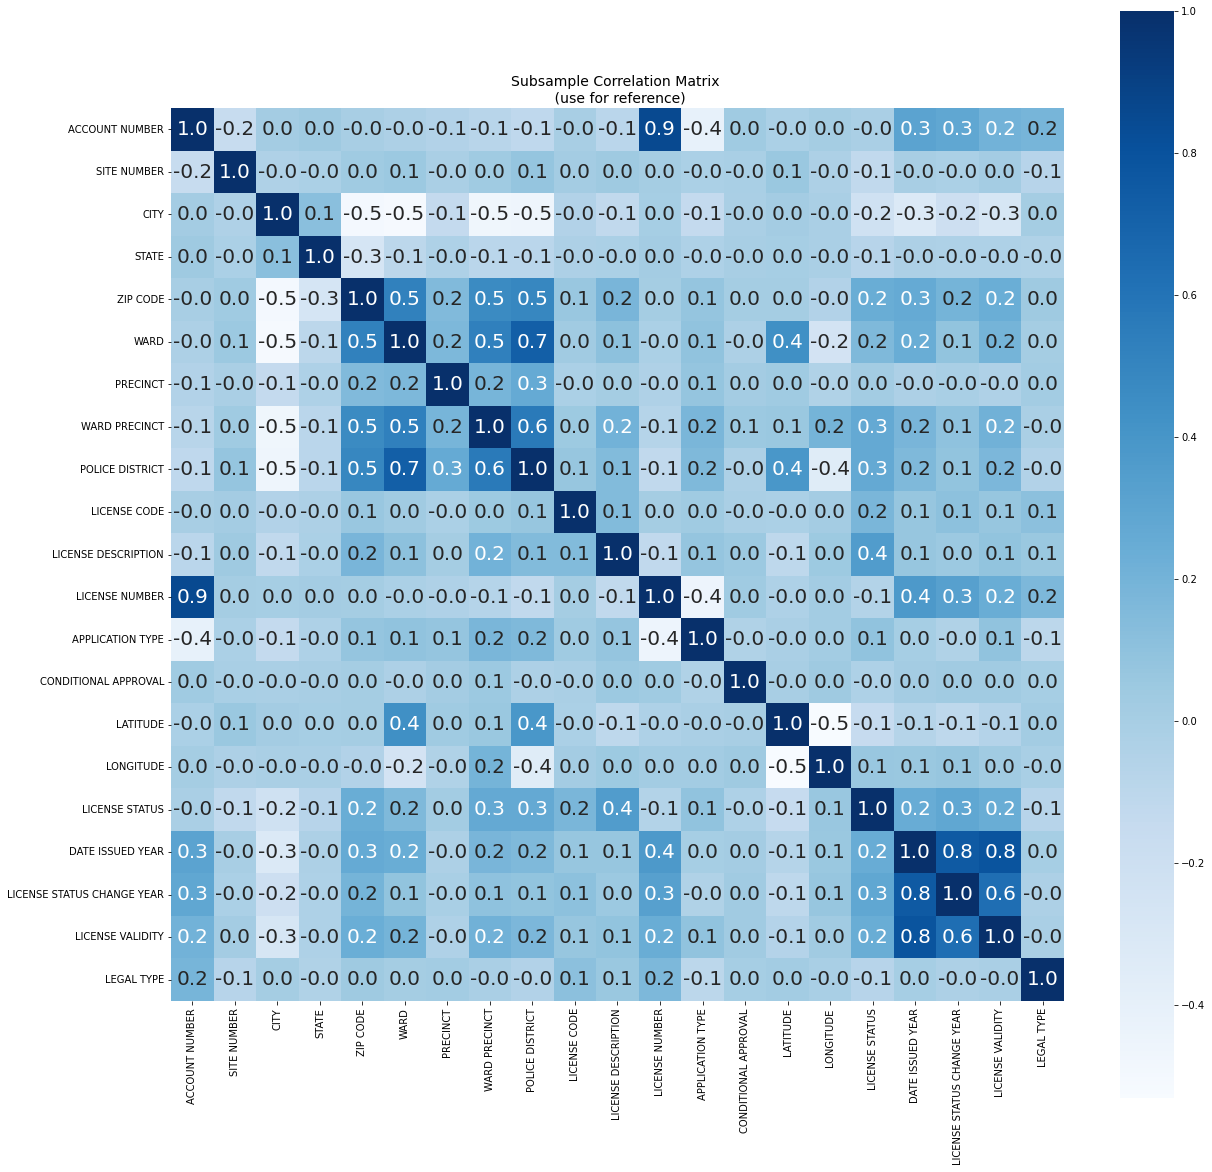

In [304]:
# Our Subsample
sub_sample_corr = new_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(sub_sample_corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='Blues')
plt.title('Subsample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()


In [305]:
# Since all the years are highly correlated, we will consider the one that has the least missing values.
col_list = ['PAYMENT YEAR', 'APPLICATION REQUIREMENTS COMPLETE YEAR', 'LICENSE APPROVED FOR ISSUANCE YEAR','PAYMENT MONTH']
Train = Train.drop(col_list, axis=1)
Test = Test.drop(col_list, axis=1)

In [306]:
Train.head(3)

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,...,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,LICENSE STATUS,DATE ISSUED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE VALIDITY,LEGAL TYPE
0,32811,1,193,16,1470,22.0,28.0,632,10.0,1010,...,35342.0,4,0,41.843613,-87.714618,1,2006,2009.0,1.0,4
1,262311,29,193,16,1460,33.0,23.0,1113,17.0,1315,...,1358463.0,4,0,41.961132,-87.699626,0,2006,2006.0,1.0,1
2,345008,1,466,16,944,0.0,0.0,50,0.0,1011,...,1980233.0,3,0,41.880952,-87.681165,1,2009,2009.0,2.0,1


In [307]:
Test.head(3)

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,DATE ISSUED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE VALIDITY,LEGAL TYPE
0,280120,1,59,13,256,42.0,67.0,1588,18.0,1020,81,1516615,5,0,41.890047,-87.637467,2012,2012.0,2.0,2
1,65043,1,59,13,281,16.0,5.0,344,7.0,1010,47,69813,5,0,41.786485,-87.676665,2012,2012.0,2.0,1
2,281270,1,59,13,251,4.0,8.0,86,1.0,1020,81,1519227,5,0,41.868269,-87.625695,2004,2011.0,1.0,0


In [308]:
Train.dtypes

ACCOUNT NUMBER                  int64
SITE NUMBER                     int64
CITY                            int32
STATE                           int32
ZIP CODE                        int32
WARD                          float64
PRECINCT                      float64
WARD PRECINCT                   int32
POLICE DISTRICT               float64
LICENSE CODE                    int64
LICENSE DESCRIPTION             int32
LICENSE NUMBER                float64
APPLICATION TYPE                int32
CONDITIONAL APPROVAL            int32
LATITUDE                      float64
LONGITUDE                     float64
LICENSE STATUS                  int32
DATE ISSUED YEAR                int64
LICENSE STATUS CHANGE YEAR    float64
LICENSE VALIDITY              float64
LEGAL TYPE                      int32
dtype: object

In [309]:
Test.dtypes

ACCOUNT NUMBER                  int64
SITE NUMBER                     int64
CITY                            int32
STATE                           int32
ZIP CODE                        int32
WARD                          float64
PRECINCT                      float64
WARD PRECINCT                   int32
POLICE DISTRICT               float64
LICENSE CODE                    int64
LICENSE DESCRIPTION             int32
LICENSE NUMBER                  int64
APPLICATION TYPE                int32
CONDITIONAL APPROVAL            int32
LATITUDE                      float64
LONGITUDE                     float64
DATE ISSUED YEAR                int64
LICENSE STATUS CHANGE YEAR    float64
LICENSE VALIDITY              float64
LEGAL TYPE                      int32
dtype: object

**All the variables are numeric.**

## Sampling the data

**We will oversample the data of REA, REV since we have very few records of those in the training set. We will also 
undersample the data of AAC and AAI since we have abundance of their data which may add bias to our model. Hence we 
will train our model on a very balanced data.**

In [310]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

Train = Train.sample(frac=1)

# Amount of fraud classes in proportion.
INQ = Train[Train['LICENSE STATUS'] == 2]
REA = Train[Train['LICENSE STATUS'] == 3]
REV = Train[Train['LICENSE STATUS'] == 4]
AAC = Train[Train['LICENSE STATUS'] == 0][:290]
AAI = Train[Train['LICENSE STATUS'] == 1][:300]

normal_distributed_df = pd.concat([INQ, REA, REV, AAC, AAI, INQ, INQ, INQ, INQ, REA, REA, INQ, REA])

# Shuffle dataframe rows
New_Train = normal_distributed_df.sample(frac=1, random_state=42)

New_Train


,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,...,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,LICENSE STATUS,DATE ISSUED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE VALIDITY,LEGAL TYPE
18145,9344,1,193,16,1442,15.0,16.0,267,9.0,1470,...,22695.0,4,0,41.815754,-87.665853,4,2010,2010.0,2.0,1
59068,376132,1,193,16,1462,6.0,0.0,46,0.0,1012,...,2192538.0,3,0,41.756237,-87.623254,0,2012,2012.0,2.0,2
40866,321342,1,193,16,1470,24.0,37.0,709,10.0,1010,...,1845458.0,4,0,41.859074,-87.715909,4,2010,2013.0,2.0,1
72792,10848,1,193,16,1499,31.0,10.0,1059,25.0,1474,...,26355.0,4,0,41.924508,-87.733980,4,2007,2007.0,2.0,1
76817,53529,1,193,16,1456,25.0,14.0,742,9.0,1010,...,30333.0,4,0,41.848925,-87.632076,4,2008,2011.0,2.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,7917,1,193,16,1524,3.0,38.0,2215,2.0,1006,...,19322.0,4,0,41.823931,-87.617911,4,2011,2012.0,2.0,1
10661,326515,1,193,16,1444,2.0,33.0,2039,18.0,1524,...,1894285.0,4,0,41.911052,-87.632255,4,2012,2012.0,2.0,0
62245,30562,1,464,16,1277,0.0,0.0,50,0.0,1010,...,26505.0,4,0,41.880952,-87.681165,1,2003,2009.0,1.0,1
5439,284152,1,193,16,1520,37.0,28.0,1277,25.0,1010,...,1545389.0,4,0,41.907488,-87.746205,0,2005,2006.0,1.0,4


C:\Users\Bharti Lenday\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


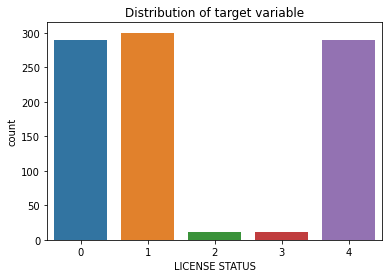

In [311]:
plt.title('Distribution of target variable')
sns.countplot(New_Train['LICENSE STATUS'])
plt.show()

In [312]:
New_Train['LICENSE STATUS'].value_counts()

1    300
4    290
0    290
2     12
3     12
Name: LICENSE STATUS, dtype: int64

**We can see from the above graph that our data is well balanced now. We will train our model on this data.**

**Saperating The Input and Output Variables.**

In [313]:
# Splitting the data into Independent and Dependent variables.

X = New_Train.drop('LICENSE STATUS', axis=1)
Y = New_Train['LICENSE STATUS']

In [314]:
# Let's check the Shape of Input and Output variables.

print(X.shape)
print(Y.shape)

(904, 20)
(904,)


In [315]:
# Checking the Independent variables.

X.head(3)

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,DATE ISSUED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE VALIDITY,LEGAL TYPE
18145,9344,1,193,16,1442,15.0,16.0,267,9.0,1470,77,22695.0,4,0,41.815754,-87.665853,2010,2010.0,2.0,1
59068,376132,1,193,16,1462,6.0,0.0,46,0.0,1012,29,2192538.0,3,0,41.756237,-87.623254,2012,2012.0,2.0,2
40866,321342,1,193,16,1470,24.0,37.0,709,10.0,1010,40,1845458.0,4,0,41.859074,-87.715909,2010,2013.0,2.0,1


In [316]:
# Checking the Dependent variable.

Y.head()

18145    4
59068    0
40866    4
72792    4
76817    4
Name: LICENSE STATUS, dtype: int32

### Splitting the Train data

**Splitting the Train data into train and test set, ratio being 75% and 25% respectively.**

In [317]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)

In [318]:
# A function to create confusion matrix function to find out sensitivity and specificity
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

## Model Building

### 1)  Logistic Regression

In [205]:
# Import library for LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, Y_train)

C:\Users\Bharti Lenday\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [206]:
# Prediction on test data
Y_pred = logreg.predict(X_test)

In [207]:
# Calculating the accuracy, precision and the recall
acc_logreg = round( metrics.accuracy_score(Y_test, Y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_logreg )

Total Accuracy :  56.19


C:\Users\Bharti Lenday\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


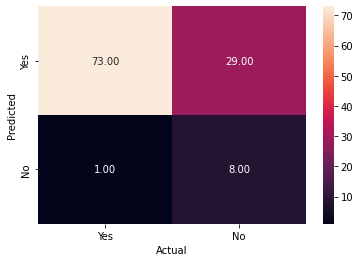

In [208]:
# Confusion matrix 
draw_cm(Y_test, Y_pred)

### 2)  Gaussian Naive Bayes

In [209]:
# Import library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,Y_train)

GaussianNB()

In [210]:
# Prediction on test set
Y_pred = model.predict(X_test)
# Calculating the accuracy, precision and the recall
acc_nb = round( metrics.accuracy_score(Y_test, Y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_nb )

Total Accuracy :  62.39


C:\Users\Bharti Lenday\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


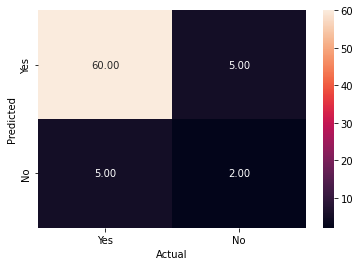

In [211]:
# Confusion matrix 
draw_cm(Y_test, Y_pred)

### 3)  Decision Tree Classifier

In [212]:
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# Hyperparameter Optimization
parameters = [{'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }]
# Run the grid search
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets 
clf.fit(X_train, Y_train)
              

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt')

In [213]:
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [214]:
# Model prediction on train data
Y_pred = clf.predict(X_train)

In [215]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, clf.tree_.compute_feature_importances()])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]

No handles with labels found to put in legend.


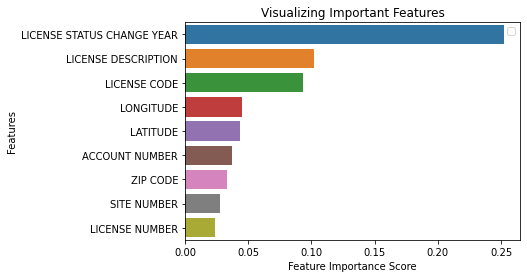

In [216]:
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [217]:
# Prediction on test set
Y_pred = clf.predict(X_test)

C:\Users\Bharti Lenday\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


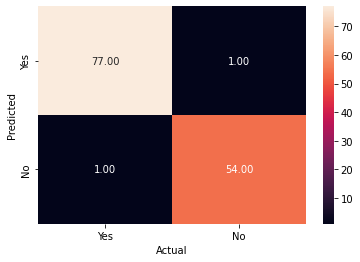

In [218]:
# Confusion matrix
draw_cm(Y_test, Y_pred)

In [219]:
# Calculating the accuracy, precision and the recall
acc_dt = round( metrics.accuracy_score(Y_test, Y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_dt )

Total Accuracy :  84.07


### 4)  Random Forest Classifier

In [220]:
# Random Forest Classifier

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=9)

No handles with labels found to put in legend.


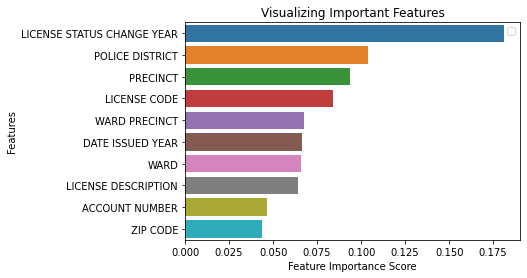

In [221]:
# Finding the variable with more importance
feature_imp = pd.Series(rf.feature_importances_,index= X_train.columns).sort_values(ascending=False)
# Creating a bar plot
feature_imp=feature_imp[0:10,]
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

C:\Users\Bharti Lenday\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


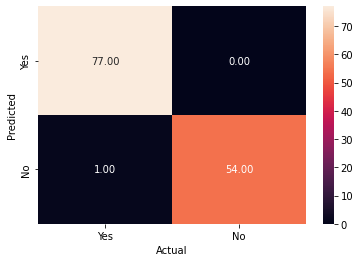

In [222]:
# Prediction on test data
Y_pred = rf.predict(X_test)
# Confusion metrix
draw_cm(Y_test, Y_pred)

In [223]:
# Calculating the accuracy, precision and the recall
acc_rf = round( metrics.accuracy_score(Y_test, Y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_rf )

Total Accuracy :  90.71


### 5)  SVM Classifier

In [224]:
# Creating scaled set to be used in model to improve the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [225]:
# Import Library of Support Vector Machine model
from sklearn import svm

# Create a Support Vector Classifier
svc = svm.SVC()

# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_

# Train the model using the training sets 
svc.fit(X_train,Y_train)

SVC(C=1000, gamma=0.001)

C:\Users\Bharti Lenday\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


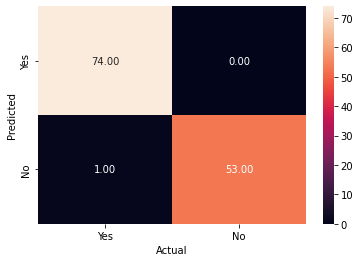

In [226]:
# Prediction on test data
Y_pred = svc.predict(X_test)
# Confusion Matrix
draw_cm(Y_test, Y_pred)

In [227]:
# Calculating the accuracy, precision and the recall
acc_svm = round( metrics.accuracy_score(Y_test, Y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_svm )

Total Accuracy :  84.51


### 6)  K - Nearest Neighbors

In [228]:
# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(X_train,Y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=10, weights='distance')

In [229]:
# Prediction on test data
Y_pred = knn.predict(X_test)

C:\Users\Bharti Lenday\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


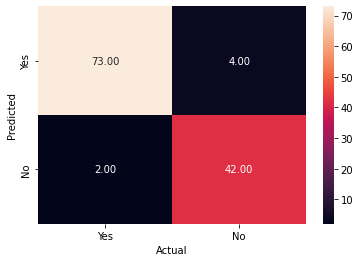

In [230]:
# Confusion Matrix
draw_cm(Y_test, Y_pred)

In [231]:
# Calculating the accuracy, precision and the recall
acc_knn = round( metrics.accuracy_score(Y_test, Y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_knn )

Total Accuracy :  81.42


### 7) XGB Classifier

In [319]:
# Import library of xgboost model
from xgboost import XGBClassifier

# Create a XGB Classifier
# gbm = XGBClassifier(learning_rate = 0.02, n_estimators= 2000, max_depth= 4, min_child_weight= 2, gamma=1, subsample=0.8, 
#                     colsample_bytree=0.8, objective= 'binary:logistic', nthread= -1, scale_pos_weight=1)
gbm = XGBClassifier()

# Train the model using the training sets
gbm.fit(X_train, Y_train)

C:\Users\Bharti Lenday\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:22:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [320]:
# Prediction on test data
Y_pred = gbm.predict(X_test)
# Calculating the accuracy, precision and the recall
acc_xgb = round( metrics.accuracy_score(Y_test, Y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_xgb )

Total Accuracy :  91.15


C:\Users\Bharti Lenday\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


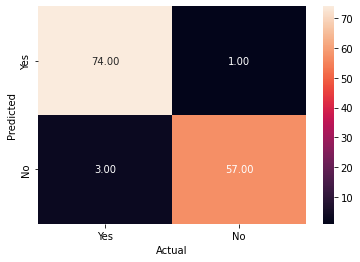

In [321]:
# Confusion matrix 
draw_cm(Y_test, Y_pred)

## Evaluation and Comparision of all the models

In [322]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'XGBoost'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn, acc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,XGBoost,91.15
3,Random Forest,90.71
4,Support Vector Machines,84.51
2,Decision Tree,84.07
5,K - Nearest Neighbors,81.42
1,Naive Bayes,62.39
0,Logistic Regression,56.19


- **I have build 7 models (Logistic Regression, Naive Bayes, Decision Tree, Random Forest, Support Vector Machines, 
    K - Nearest Neighbors, XGBoost).**
- **I have checked the accuracy in each of this model.**
- **I have notice that XGBoost Classifier Model has more accuracy compare to the other model.**
- **I have fixed XGBoost Classifier Model (XGB) as my final model.** 

## Fixed XGBoost Classifier Model (XGB) as my final model

**Now we will predict 'LICENSE STATUS' for Test data using XGBoost Classifier Model (XGB).**

In [323]:
Train.shape

(85895, 21)

In [324]:
Test.shape

(57239, 20)

In [326]:
# Predicting on the test dataset
my_prediction = gbm.predict(Test.values)

In [327]:
my_submission['LICENSE STATUS'] = my_prediction

In [332]:
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(0, 'AAI')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(1, 'REA')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(2, 'REV')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(3, 'INQ')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(4, 'AAC')

In [333]:
my_submission['LICENSE STATUS'].value_counts()

AAC    36126
REV    19687
INQ     1115
AAI      270
REA       41
Name: LICENSE STATUS, dtype: int64

In [334]:
# Saving predictions to file
my_submission.to_csv('submission.csv', index=False)